In [ ]:
from tensorflow import keras
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import mode
import graphviz
import plotly.express as px
import random
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import graphviz

# PROBLEM 1: Supervised Classification Libraries: Regression, Decision Tree

# MNIST L2-reg Logistic Regression

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [ ]:
mean = X_train.mean().astype(np.float32)
std = X_train.std().astype(np.float32)
X_train = (X_train - mean)/(std)

In [ ]:
mean= X_test.mean().astype(np.float32)
std = X_test.std().astype(np.float32)
X_test = (X_test - mean)/(std)

In [ ]:
clf = LogisticRegression(penalty ='l2', solver ='saga', max_iter = 100, random_state = 42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='saga')

In [ ]:
# Get the top 30 features
coef_abs = np.abs(clf.coef_)
top_indices = np.argsort(coef_abs)[::-1][:30]
top_features = X_train[:, top_indices]

# Print the top features
print(top_indices)

[[550  73 329 ... 416 359 444]
 [220 638 431 ... 277 248 360]
 [194  64  65 ... 595 580 122]
 ...
 [246 311 726 ... 473 474 501]
 [109 369 371 ... 537 565 621]
 [438 179 577 ... 408 718 434]]


In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 92.65


# MNIST Decision Tree

In [ ]:
# Train the decision tree model
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dot_data = tree.export_graphviz(clf, max_depth = 30)

# Plotting the tree
graph = graphviz.Source(dot_data, format = "png" ) 
graph

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 87.72


# Spambase L2-reg Logistic Regression

In [ ]:
data_spam = pd.read_csv('spambase.data', header=None)
data_spam.rename(columns={57:'is_spam'}, inplace=True)

In [ ]:
data_spam

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
X = data_spam.drop(['is_spam'], axis = 1)
y = data_spam['is_spam']

In [ ]:
# Scale the features, as the original values have wide ranges
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
clf = LogisticRegression(penalty ='l2', solver ='liblinear', max_iter = 100, random_state = 42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Get the top 30 features
coef_abs = np.abs(clf.coef_)
top_indices = np.argsort(coef_abs)[::-1][:30]
top_features = X_train[:, top_indices]

# Print the top features
print(top_indices)

[[12 36 10 33 49 31  2 13  9 11 50 37  0 17 18 29 46  1  8  5 54 39 27 14
  30 20 21  7 42 48 51 35  4 38 19 16 56 23 32 47 44 15 43  6 55 25 22  3
  53 52 34 28 45 41 40 24 26]]


In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 91.96525515743757


# Spambase Decision Tree

In [ ]:
# Train the decision tree model
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

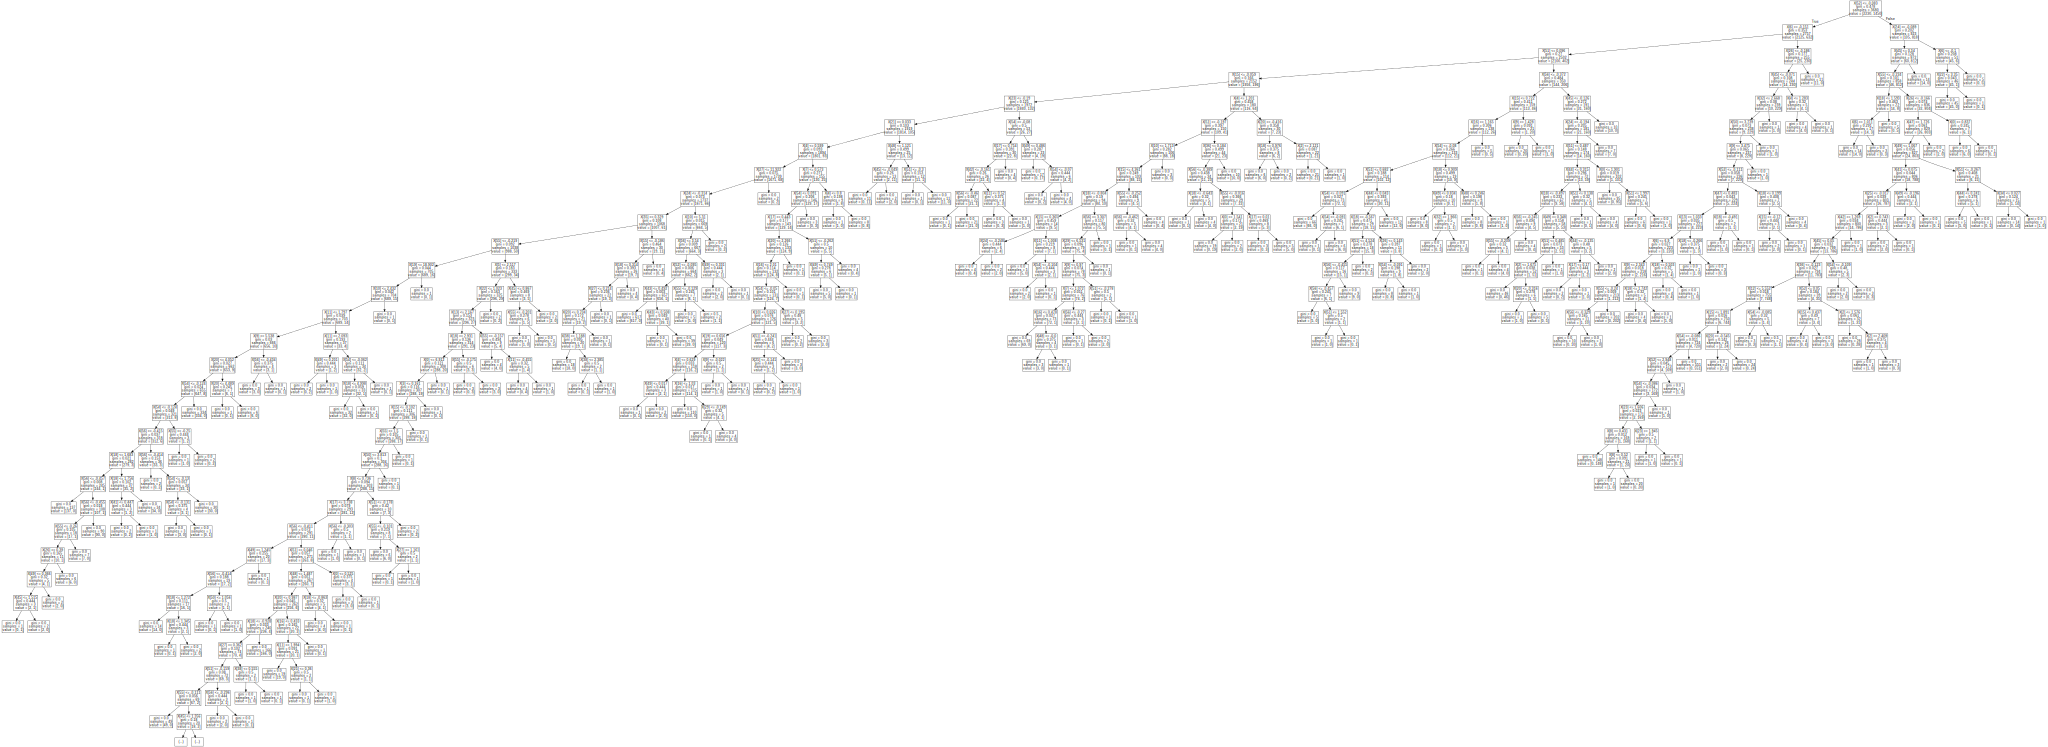

In [ ]:
dot_data = tree.export_graphviz(clf, max_depth = 30)

# Plotting the tree
graph = graphviz.Source(dot_data, format = "png" ) 
graph

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 90.77090119435395


# 20NG L2-reg Logistic Regression

In [ ]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\s+\w{1}\s+', '', text)
    return text

def preprocessor(text):
    text = clean_text(text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = text.split()
    tokens = [porter.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')


# Apply the preprocessor to the training data
X_train = [preprocessor(text) for text in newsgroups_train.data]
y_train = newsgroups_train.target

# Apply the preprocessor to the test data
X_test = [preprocessor(text) for text in newsgroups_test.data]
y_test = newsgroups_test.target

# Define the TF-IDF vectorizer and fit it on the training data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# Extract the feature names and the top features
feature_names = np.array(vectorizer.get_feature_names())
clf = LogisticRegression(penalty ='l2', solver ='lbfgs')
clf.fit(X_train, y_train)
top_indices = np.argsort(clf.coef_[0])[-30:]
top_features = feature_names[top_indices]
print(top_features)

['argument' 'mozumd' 'ryan' 'post' 'say' 'bobbi' 'punish' 'motto' 'cruel'
 'charley' 'quran' 'allan' 'peopl' 'gregg' 'wingat' 'rushdi' 'beauchain'
 'livesey' 'schneider' 'religion' 'bibl' 'benedikt' 'mathew' 'jon'
 'atheism' 'moral' 'god' 'atheist' 'islam' 'keith']


In [ ]:
# Transform the test data using the fitted vectorizer
X_test = vectorizer.transform(X_test)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 81.91715347849177


# 20NG Decision Tree

In [ ]:
# Transform the test data using the fitted vectorizer
X_test = vectorizer.transform(X_test)

In [ ]:
# Train the decision tree model
clf = DecisionTreeClassifier(max_depth = 30)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)
 
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 44.211364843335105


In [ ]:
# Train the decision tree model
clf = DecisionTreeClassifier(max_depth = 100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 54.182156133829


# PROBLEM 2 : PCA library on MNIST

# A)

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [ ]:
mean = X_train.mean().astype(np.float32)
std = X_train.std().astype(np.float32)
X_train = (X_train - mean)/(std)

In [ ]:
mean= X_test.mean().astype(np.float32)
std = X_test.std().astype(np.float32)
X_test = (X_test - mean)/(std)

In [ ]:
# Applying PCA to reduce dimensionality to D = 5
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
clf = LogisticRegression(penalty ='l2', solver ='saga', max_iter = 100, random_state = 42)
clf.fit(X_train_pca, y_train)

LogisticRegression(random_state=42, solver='saga')

In [ ]:
# Get the top 30 features
coef_abs = np.abs(clf.coef_)
top_indices = np.argsort(coef_abs)[::-1][:30]
top_features = X_train[:, top_indices]

# Print the top features
print(top_indices)

[[2 0 4 3 1]
 [2 0 3 1 4]
 [2 0 3 4 1]
 [0 1 2 4 3]
 [2 1 0 4 3]
 [2 0 4 3 1]
 [4 0 2 3 1]
 [0 2 4 1 3]
 [4 2 3 1 0]
 [2 1 3 4 0]]


In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 68.72


# Decision Tree

In [ ]:
# Applying PCA to reduce dimensionality to D = 5
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Train the decision tree model
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 67.22


# For D = 20

In [ ]:
# Applying PCA to reduce dimensionality to D = 20
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
clf = LogisticRegression(penalty ='l2', solver ='saga', max_iter = 100, random_state = 42)
clf.fit(X_train_pca, y_train)

LogisticRegression(random_state=42, solver='saga')

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 88.0


# Decision Tree

In [ ]:
# Applying PCA to reduce dimensionality to D = 20
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Train the decision tree model
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 84.86


# B)

# PCA library on Spambase

In [ ]:
data_spam = pd.read_csv('spambase.data', header=None)
data_spam.rename(columns={57:'is_spam'}, inplace=True)

In [ ]:
X = data_spam.drop(['is_spam'], axis = 1)
y = data_spam['is_spam']

In [ ]:
# Scale the features, as the original values have wide ranges
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
# Applying PCA to reduce dimensionality to D = 20
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
clf = LogisticRegression(penalty ='l2', solver ='liblinear', max_iter = 100, random_state = 42)
clf.fit(X_train_pca, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 90.98805646036917


*The smallest D (number of PCA dimensions) need to get a comparable test result is 20*

# PROBLEM 3 : Implement PCA on MNIST

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# Preprocess the data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)
mean = X_train.mean().astype(np.float32)
std = X_train.std().astype(np.float32)
X_train = (X_train - mean)/(std)
mean= X_test.mean().astype(np.float32)
std = X_test.std().astype(np.float32)
X_test = (X_test - mean)/(std)

In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X_train.T)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order and selecting the top k eigenvectors
k = 5
idx = eigenvalues.argsort()[::-1][:k]
top_k_eigenvectors = eigenvectors[:,idx].real

# Transforming the data into the reduced k-dimensional space
X_train_reduced = np.dot(X_train, top_k_eigenvectors)
X_test_reduced = np.dot(X_test, top_k_eigenvectors)

In [ ]:
clf = LogisticRegression(penalty ='l2', solver ='saga', max_iter = 100, random_state = 42)
clf.fit(X_train_reduced, y_train)

LogisticRegression(random_state=42, solver='saga')

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 68.73


# For D = 20

In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X_train.T)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order and selecting the top k eigenvectors
k = 20
idx = eigenvalues.argsort()[::-1][:k]
top_k_eigenvectors = eigenvectors[:,idx].real

# Transforming the data into the reduced k-dimensional space
X_train_reduced = np.dot(X_train, top_k_eigenvectors)
X_test_reduced = np.dot(X_test, top_k_eigenvectors)

In [ ]:
clf = LogisticRegression(penalty ='l2', solver ='saga', max_iter = 100, random_state = 42)
clf.fit(X_train_reduced, y_train)

LogisticRegression(random_state=42, solver='saga')

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 88.01


# Decision Trees

# For D = 5

In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X_train.T)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order and selecting the top k eigenvectors
k = 5
idx = eigenvalues.argsort()[::-1][:k]
top_k_eigenvectors = eigenvectors[:,idx].real

# Transforming the data into the reduced k-dimensional space
X_train_reduced = np.dot(X_train, top_k_eigenvectors)
X_test_reduced = np.dot(X_test, top_k_eigenvectors)

In [ ]:
# Train the decision tree model
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train_reduced, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 67.24


# For D = 20

In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X_train.T)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order and selecting the top k eigenvectors
k = 20
idx = eigenvalues.argsort()[::-1][:k]
top_k_eigenvectors = eigenvectors[:,idx].real

# Transforming the data into the reduced k-dimensional space
X_train_reduced = np.dot(X_train, top_k_eigenvectors)
X_test_reduced = np.dot(X_test, top_k_eigenvectors)

In [ ]:
# Train the decision tree model
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train_reduced, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Calculate the accuracy on the test set
y_pred = clf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy:', accuracy)

Accuracy: 85.07000000000001


# PROBLEM 4 : PCA for cluster visualization

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)
mean = X_train.mean().astype(np.float32)
std = X_train.std().astype(np.float32)
X_train = (X_train - mean)/(std)
mean= X_test.mean().astype(np.float32)
std = X_test.std().astype(np.float32)
X_test = (X_test - mean)/(std)

11490434/11490434 [==============================] - 1s 0us/step


# A)

In [ ]:
# Perform KMeans clustering on the data
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

# B)

In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X_train.T)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order and selecting the top k eigenvectors
k = 3
idx = eigenvalues.argsort()[::-1][:k]
top_k_eigenvectors = eigenvectors[:,idx].real

# Transforming the data into the reduced k-dimensional space
X_test_reduced = np.dot(X_test, top_k_eigenvectors)

# C)

In [ ]:
# Add the cluster and true digit label as columns to the test data
test_df = pd.DataFrame(X_test_reduced, columns=['PC1', 'PC2', 'PC3'])
test_df['label'] = y_test
test_df['cluster'] = y_pred

In [ ]:
# Create the 3D scatter plot with Plotly Express
fig = px.scatter_3d(test_df, x ='PC1', y ='PC2', z ='PC3', color ='cluster', symbol = 'label')
fig.update_traces(marker_size = 1)
fig.show()

# D)

In [ ]:
# Compute the covariance matrix
cov_matrix = np.cov(X_train.T)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [ ]:
# Select 3 random eigenvalues from top 20
np.random.seed(42)
top_k = 3
idx = np.random.choice(range(20), top_k, replace=False)
idx = eigenvalues.argsort()[::-1][idx]
top_k_eigenvectors = eigenvectors[:, idx].real

# Transforming the data into the reduced k-dimensional space
X_test_reduced = np.dot(X_test, top_k_eigenvectors)

# Add the cluster and true digit label as columns to the test data
test_df = pd.DataFrame(X_test_reduced, columns=[f'PC{i+1}' for i in range(top_k)])
test_df['label'] = y_test
test_df['cluster'] = y_pred

# Create the 3D scatter plot with Plotly Express
fig = px.scatter_3d(test_df, x ='PC1', y ='PC2', z ='PC3', color='cluster', symbol='label')
fig.update_traces(marker_size=1)
fig.show()

# PROBLEM 5 : Implement Kernel PCA for linear regression

# A)

# Two Spirals

In [ ]:
df_spirals = pd.read_csv('twoSpirals.txt',sep='\t', header = None)

In [ ]:
X_sp = df_spirals[[0,1]]
y_sp = df_spirals[2]

In [ ]:
# Training linear regression model
reg = LinearRegression()
reg.fit(X_sp, y_sp)

# Evaluating model on test set
y_pred = reg.predict(X_sp)
rmse = mean_squared_error(y_sp, y_pred, squared = False)
print('RMSE:', rmse)

RMSE: 0.9161275600733834


# Three Circles

In [ ]:
df_circles = pd.read_csv('threecircles.txt', sep = ',', header = None)

In [ ]:
X_c = df_circles[[0,1]]
y_c = df_circles[2]

In [ ]:
# Training linear regression model
reg = LinearRegression()
reg.fit(X_c, y_c)

# Evaluating model on test set
y_pred_c = reg.predict(X_c)
rmse = mean_squared_error(y_c, y_pred_c, squared = False)
print('RMSE:', rmse)

RMSE: 0.8160181029387729


# B)

In [ ]:
def kernel_pca(X, n_comp, sigma):
    # Computing kernel matrix K
    dist_euclid = euclidean_distances(X, squared=True)
    K = np.exp(-dist_euclid / (sigma))

    # Normalizing kernel matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    Kn = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Computing eigenvectors and eigenvalues of kernel matrix
    eig_vals, eig_vecs = np.linalg.eigh(Kn)

    # Sorting eigenvectors and eigenvalues in descending order
    idx = eig_vals.argsort()[::-1]
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:, idx]

    # Projecting data onto principal components
    X_pc = np.zeros((N, n_comp))
    for i in range(n_comp):
        X_pc[:, i] = eig_vecs[:, i].dot(Kn)

    return X_pc

# C)

# Two Spirals

In [ ]:
for n in [3, 20, 100]:
    # Project data onto principal components
    X_sp_pc = kernel_pca(X_sp.to_numpy(), n_comp = n, sigma = 3)
   
    # Train linear regression model on projected data
    reg = LinearRegression()
    reg.fit(X_sp_pc, y_sp)

    # Evaluate model on test set
    y_pred = reg.predict(X_sp_pc)
    rmse = mean_squared_error(y_sp, y_pred, squared = False)
    print('RMSE (n_components = {}): {:.3f}'.format(n, rmse))

RMSE (n_components = 3): 0.915
RMSE (n_components = 20): 0.426
RMSE (n_components = 100): 0.087


# Three Circles

In [ ]:
for n in [3, 20, 100]:
    # Project data onto principal components
    X_c_pc = kernel_pca(X_c.to_numpy(), n_comp = n, sigma = 3)
   
    # Train linear regression model on projected data
    reg = LinearRegression()
    reg.fit(X_c_pc, y_c)

    # Evaluate model on test set
    y_pred_c = reg.predict(X_c_pc)
    rmse = mean_squared_error(y_c, y_pred_c, squared = False)
    print('RMSE (n_components = {}): {:.3f}'.format(n, rmse))

RMSE (n_components = 3): 0.174
RMSE (n_components = 20): 0.071
RMSE (n_components = 100): 0.020


*The number of components needs to be 100 in order to get good performance since a higher number of components can capture more complex patterns in the data, allowing for better separation between the classes.*